In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']

In [2]:
data = pd.read_excel('D:/lecture/研一上学期/数据可视化/hwk_fin/hwk_fin/data.xlsx')
print(data.columns)
print(data.info())
# 缺失值查看
print(data.isnull().sum())
# 删除含有缺失值的行
data=data.dropna()

Index(['stkcd', 'year', '证券代码', '行业代码', 'Size', 'Lev', 'ROA', 'ROE', 'ATO',
       'Cashflow', 'REC', 'INV', 'FIXED', 'Growth', 'Loss', 'Board', 'Indep',
       'Dual', 'Top1', 'Top5', 'Top10', 'Balance1', 'Balance2', 'BM', 'TobinQ',
       'SOE', 'ListAge', 'FirmAge', 'Dturn', 'INST', 'Mshare', 'Mfee',
       'Occupy', 'Big4', 'Opinion', 'Industry', 'Year'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49284 entries, 0 to 49283
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   stkcd     49284 non-null  int64  
 1   year      49284 non-null  int64  
 2   证券代码      49284 non-null  int64  
 3   行业代码      49284 non-null  object 
 4   Size      49281 non-null  float64
 5   Lev       49281 non-null  float64
 6   ROA       49280 non-null  float64
 7   ROE       48714 non-null  float64
 8   ATO       49280 non-null  float64
 9   Cashflow  49281 non-null  float64
 10  REC       48906 non-null  float64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1703 entries, 26 to 46939
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   stkcd     1703 non-null   int64  
 1   year      1703 non-null   int64  
 2   证券代码      1703 non-null   int64  
 3   行业代码      1703 non-null   object 
 4   Size      1703 non-null   float64
 5   Lev       1703 non-null   float64
 6   ROA       1703 non-null   float64
 7   ROE       1703 non-null   float64
 8   ATO       1703 non-null   float64
 9   Cashflow  1703 non-null   float64
 10  REC       1703 non-null   float64
 11  INV       1703 non-null   float64
 12  FIXED     1703 non-null   float64
 13  Growth    1703 non-null   float64
 14  Loss      1703 non-null   int64  
 15  Board     1703 non-null   float64
 16  Indep     1703 non-null   float64
 17  Dual      1703 non-null   int64  
 18  Top1      1703 non-null   float64
 19  Top5      1703 non-null   float64
 20  Top10     1703 non-null   fl

C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figures/correlation.jpg


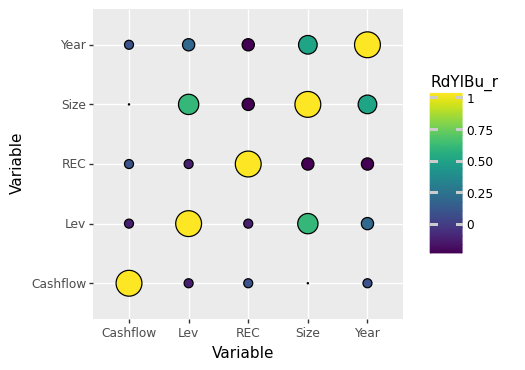

<ggplot: (157853713140)>

In [4]:
dataK = data[data['Industry']=="K"]  #选取房地产行业为研究对象
dataK.info()
dataK.isnull().sum()   #无缺失值

# 变量之间的相关性
df_corr = dataK[['Year','Size','Lev','Cashflow','REC']]
mat_corr=np.round(df_corr.corr(),1).reset_index()
mydata=pd.melt(mat_corr,id_vars='index',var_name='variable',value_name='value')
mydata['AbsValue']=np.abs(mydata.value)

p=(
    ggplot(mydata, aes(x ='index', y ='variable', fill = 'value',size='AbsValue')) +  
    geom_point(shape='o',color="black") +
    scale_size_area(max_size=10, guide=False) +
    scale_fill_cmap(name ='RdYlBu_r')+
    coord_equal()+
    theme(dpi=100,figure_size=(4,4))+
    labs(x='Variable', y='Variable')
)
# 得到大致的结论：
# year和size成正相关，
# size和lev成正相关，越大的公司，负债率越高，他们的话语权更高，负债率更高
# 
p.save('D:/Latex_Project/Visualization_Project/Figures/correlation.jpg', height=5, width=5, units = 'in', dpi=1000)
p

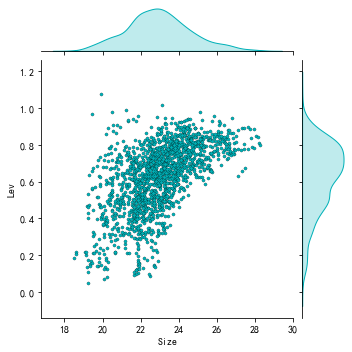

In [5]:
# 探究Size和Lev的具体相关性
#二维散点与一维核密度估计图
from scipy import stats

g = sns.JointGrid(x="Size", y="Lev", data=dataK, height = 5, ratio = 5)
g = g.plot_joint(plt.scatter,
                color="#00B1B8", s=10, edgecolor="black",linewidth=0.2)
g = g.plot_marginals(sns.kdeplot, shade=True,color="#00B1B8")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g.set_axis_labels(xlabel="Size", ylabel="Lev") 

g.savefig('D:/Latex_Project/Visualization_Project/Figures/SizeLev.jpg')
g

C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figures/size_plot.jpg
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


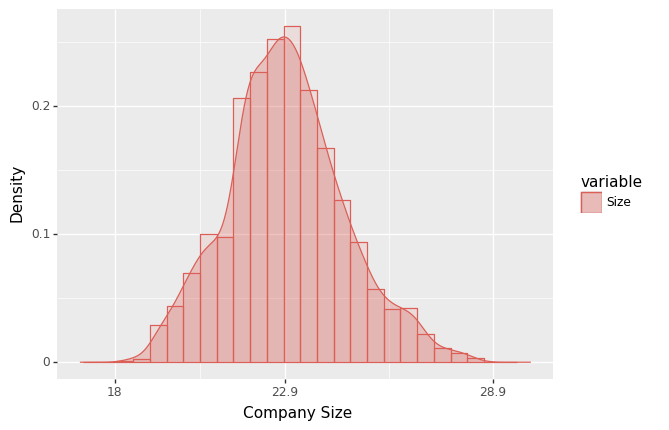

<ggplot: (157850974928)>

In [6]:
# 各变量的分布
data_dis = dataK[['证券代码','Year','Size','Lev','Cashflow','REC']]
data_1 = pd.melt(data_dis, value_vars=['Size'])
data_2 = pd.melt(data_dis, value_vars=['REC'])
data_3 = pd.melt(data_dis, value_vars=['Lev','Cashflow'])
data_4 = pd.melt(data_dis, value_vars=['REC','Lev','Cashflow'])
p=(
    ggplot(data_1)
    +geom_histogram(aes(x="value", y=after_stat('density'),color='variable',fill='variable'), bins = 28,alpha=0.1)
    +geom_density(aes(x="value",y=after_stat('density'),color='variable',fill='variable'),alpha=0.3)
    + labs(x='Company Size', y='Density')
    + scale_x_continuous(breaks=(0,18,22.9,28.9),limits=(17,30))
)
# Size 几乎为正态分布，没有明显的左右偏的情况
p.save('D:/Latex_Project/Visualization_Project/Figures/size_plot.jpg', height=5, width=5, units = 'in', dpi=1000)
p

C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figures/cash_lev.jpg


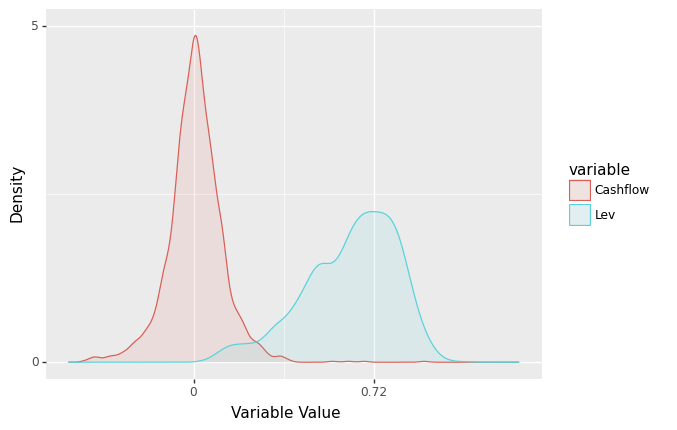

<ggplot: (157852250362)>

In [7]:
p=(
    ggplot(data_3, aes(x='value',color='variable',fill='variable'))
    + geom_density(alpha=0.1)
    + scale_x_continuous(breaks=(0,0.72),limits=(-0.5,1.3))
    + scale_y_continuous(breaks=(0,5),limits=(0,5))
    + labs(x='Variable Value', y='Density')
)
p.save('D:/Latex_Project/Visualization_Project/Figures/cash_lev.jpg', height=5, width=5, units = 'in', dpi=1000)
p

C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figures/rec.jpg


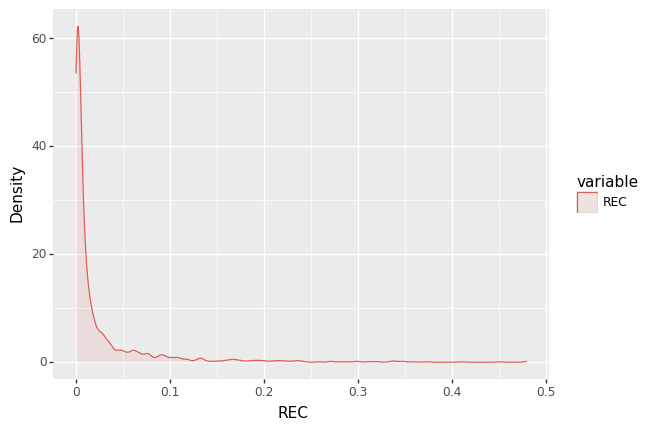

<ggplot: (157852192519)>

In [8]:
p=(
    ggplot(data_2, aes(x='value',color='variable',fill='variable'))
    + geom_density(alpha=0.1)
    + labs(x='REC', y='Density')
)
p.save('D:/Latex_Project/Visualization_Project/Figures/rec.jpg', height=5, width=5, units = 'in', dpi=1000)
p

C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 0.5 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figures/sizeyearlev.jpg
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\layer.py:391: PlotnineWarning: position_stack : Removed 2 rows containing missing values.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\layer.py:391: PlotnineWarning: position_stack : Removed 2 rows containing missing values.


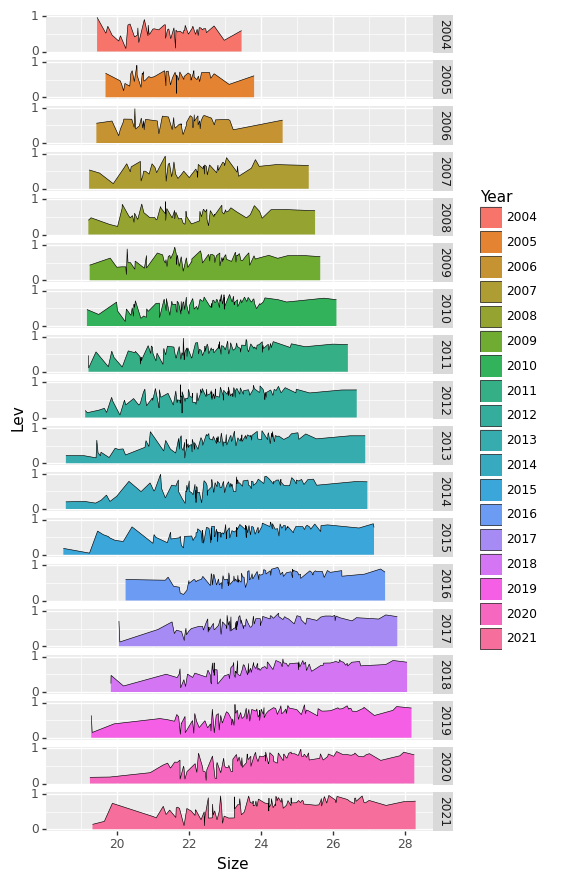

<ggplot: (157850969703)>

In [9]:
# 不同年份下，Size与资产负债率的关系
data_compare = dataK.copy()
data_compare['Year'] = data_compare['Year'].astype('category')
p=(
    ggplot(data_compare,aes('Size','Lev',fill='Year'))
    + geom_area(color="black",size=0.25)
    + scale_y_continuous(breaks=(0,1),limits=(0,1))
    + facet_grid('Year~.')
    + scale_fill_hue(s = 0.90, l = 0.65, h=0.0417,color_space='husl')
    + theme(aspect_ratio =0.1,
       dpi=100,
       figure_size=(5,0.5))
)
p.save('D:/Latex_Project/Visualization_Project/Figures/sizeyearlev.jpg', units = 'in', dpi=1000)
p

C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 0.5 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figures/sizeyearcash.jpg
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\layer.py:391: PlotnineWarning: position_stack : Removed 776 rows containing missing values.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\layer.py:391: PlotnineWarning: position_stack : Removed 776 rows containing missing values.


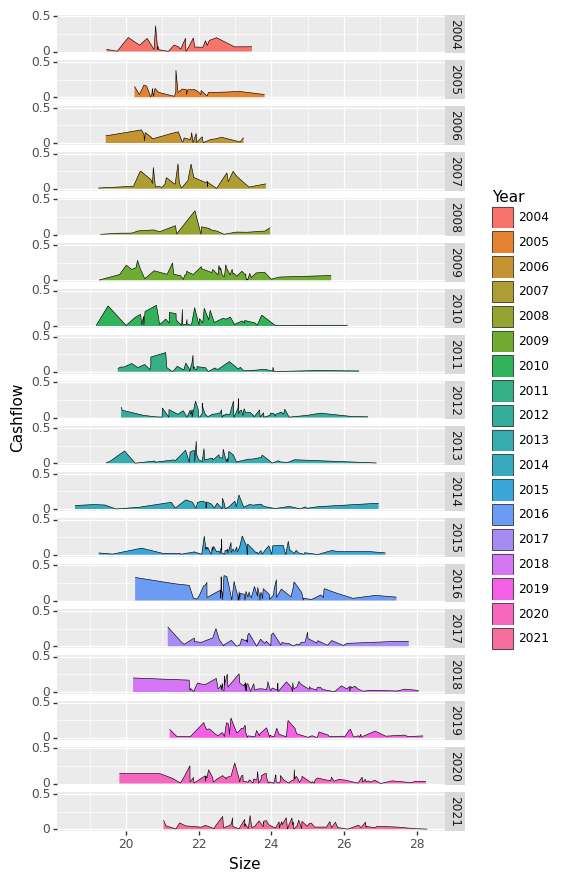

<ggplot: (157850428139)>

In [10]:
# 不同年份下，Size与Cashflow的关系
data_compare = dataK.copy()
data_compare['Year'] = data_compare['Year'].astype('category')
p=(
    ggplot(data_compare,aes('Size','Cashflow',fill='Year'))
    + geom_area(color="black",size=0.25)
    + scale_y_continuous(breaks=(0,0.5),limits=(0,0.5))
    + facet_grid('Year~.')
    + scale_fill_hue(s = 0.90, l = 0.65, h=0.0417,color_space='husl')
    + theme(aspect_ratio =0.1,
       dpi=100,
       figure_size=(5,0.5))
)
p.save('D:/Latex_Project/Visualization_Project/Figures/sizeyearcash.jpg', units = 'in', dpi=1000)
p

C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 0.5 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figures/sizeyearrec.jpg


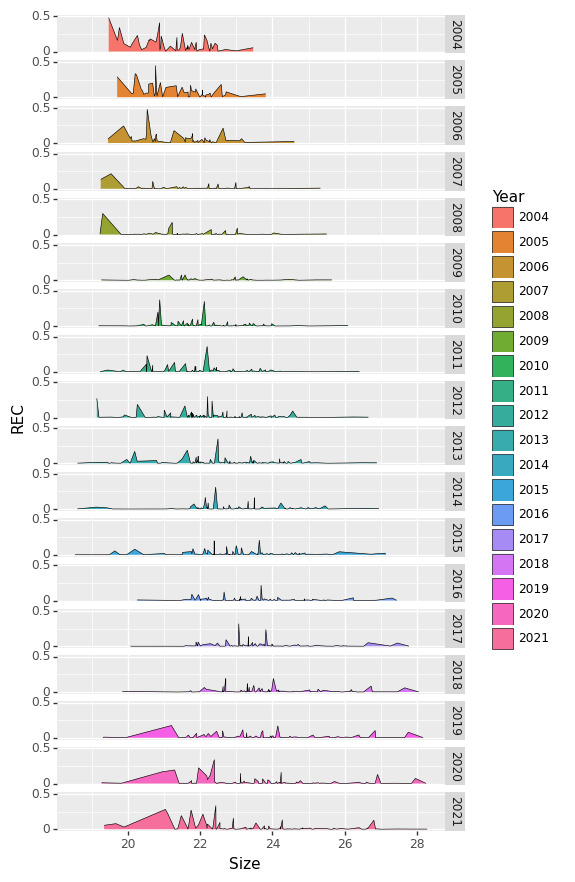

<ggplot: (157853236468)>

In [11]:
# 不同年份下，Size与REC的关系
data_compare = dataK.copy()
data_compare['Year'] = data_compare['Year'].astype('category')
p=(
    ggplot(data_compare,aes('Size','REC',fill='Year'))
    + geom_area(color="black",size=0.25)
    + scale_y_continuous(breaks=(0,0.5),limits=(0,0.5))
    + facet_grid('Year~.')
    + scale_fill_hue(s = 0.90, l = 0.65, h=0.0417,color_space='husl')
    + theme(aspect_ratio =0.1,
       dpi=100,
       figure_size=(5,0.5))
)
p.save('D:/Latex_Project/Visualization_Project/Figures/sizeyearrec.jpg', units = 'in', dpi=1000)
p

C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\840412821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\840412821.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figures/

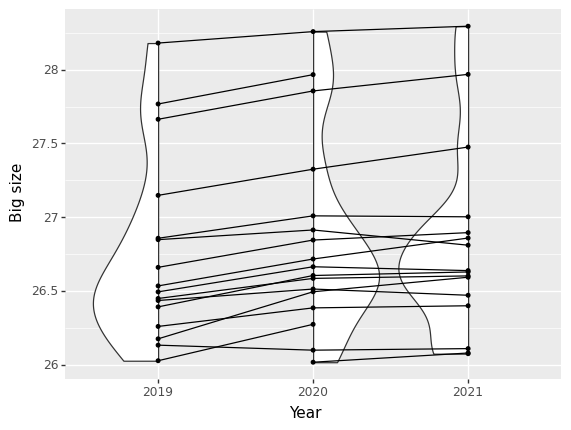

<ggplot: (157853470474)>

In [12]:
# 某个行业在2020年疫情前后的Size变化
data_compare = data_dis[dataK['Year'].isin([2019,2020,2021])]
data_compare['证券代码'] = data_compare['证券代码'].astype('category')
data_compare['Year'] = data_compare['Year'].astype('category')
p=(
    ggplot(data_compare[data_compare['Size']>26], aes('Year', 'Size'))
     + geom_violin(style='left-right') 
     + geom_point(shape='o', size=1, color='k')
     + geom_line(aes(group='证券代码'))          #根据id来进行连接
     + labs(x='Year', y='Big size')   
)
# 高的企业他还是往上的，而稍微小一些的就会被疫情影响
p.save('D:/Latex_Project/Visualization_Project/Figures/covbigsize.jpg', units = 'in', dpi=1000)
p

C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\1566615393.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\1566615393.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figure

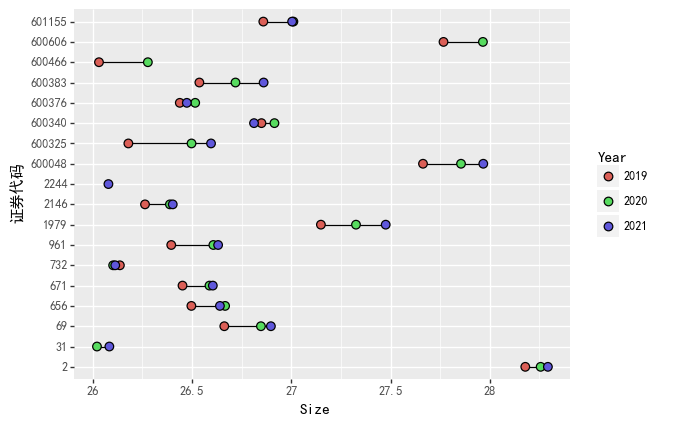

<ggplot: (157853287403)>

In [13]:
# 大规模size大于26的房地产公司经历疫情的size变化
data_compare = data_dis[dataK['Year'].isin([2019,2020,2021])]
data_compare['证券代码'] = data_compare['证券代码'].astype('category')
data_compare['Year'] = data_compare['Year'].astype('category')
p=(
    ggplot(data_compare[data_compare['Size']>26], aes('Size', '证券代码', fill='Year'))
    + geom_line(aes(group='证券代码'))
    + geom_point(shape='o', size=3, color='k')
    + theme(text=element_text(family=['SimHei', 'Arial Unicode MS']))
)
p.save('D:/Latex_Project/Visualization_Project/Figures/covbigsize2.jpg', units = 'in', dpi=1000)
p

C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\1242495760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\1242495760.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figure

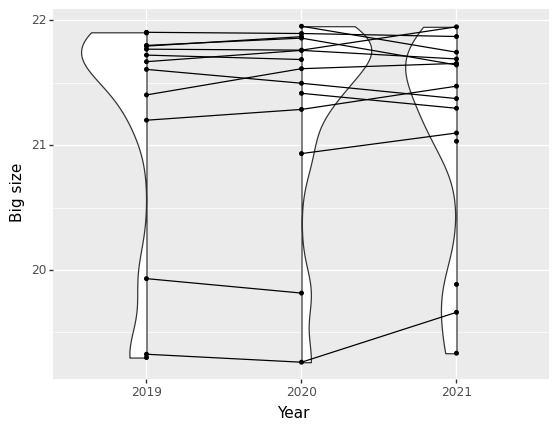

<ggplot: (157853281428)>

In [14]:
# 小规模在2020年疫情前后的Size变化
data_compare = data_dis[dataK['Year'].isin([2019,2020,2021])]
data_compare['证券代码'] = data_compare['证券代码'].astype('category')
data_compare['Year'] = data_compare['Year'].astype('category')
p=(
    ggplot(data_compare[data_compare['Size']<22], aes('Year', 'Size'))
     + geom_violin(style='left-right') 
     + geom_point(shape='o', size=1, color='k')
     + geom_line(aes(group='证券代码'))          #根据id来进行连接
     + labs(x='Year', y='Big size')
)
# 高的企业他还是往上的，而稍微小一些的就会被疫情影响
p.save('D:/Latex_Project/Visualization_Project/Figures/covsmallsize.jpg', units = 'in', dpi=1000)
p

C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\3933261731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\3933261731.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figure

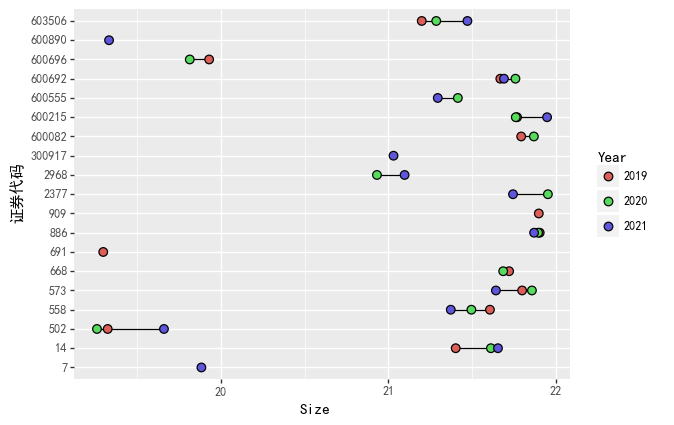

<ggplot: (157850815928)>

In [15]:
# 小规模size小于22的房地产公司经历疫情的size变化
data_compare = data_dis[dataK['Year'].isin([2019,2020,2021])]
data_compare['证券代码'] = data_compare['证券代码'].astype('category')
data_compare['Year'] = data_compare['Year'].astype('category')
p=(
    ggplot(data_compare[data_compare['Size']<22], aes('Size', '证券代码', fill='Year'))
    + geom_line(aes(group='证券代码'))
    + geom_point(shape='o', size=3, color='k')
    + theme(text=element_text(family=['SimHei', 'Arial Unicode MS']))
)
# 对于小房地产公司而言，大多是衰退，甚至退市。
p.save('D:/Latex_Project/Visualization_Project/Figures/covsmallsize2.jpg', units = 'in', dpi=1000)
p

C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\4055778167.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\4055778167.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figure

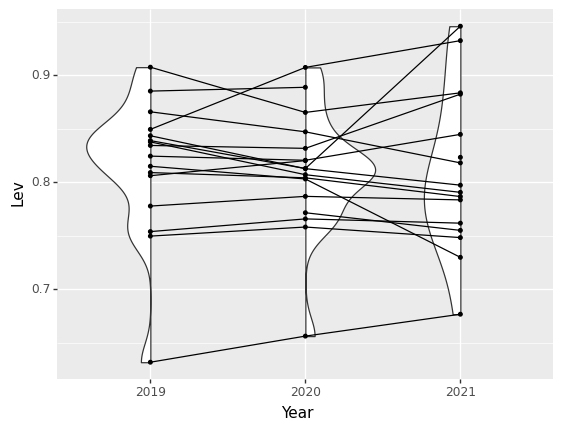

<ggplot: (157850428465)>

In [16]:
# 大规模在2020年疫情前后的Lev变化
data_compare = data_dis[dataK['Year'].isin([2019,2020,2021])]
data_compare['证券代码'] = data_compare['证券代码'].astype('category')
data_compare['Year'] = data_compare['Year'].astype('category')
p=(
    ggplot(data_compare[data_compare['Size']>26], aes('Year', 'Lev'))
     + geom_violin(style='left-right') 
     + geom_point(shape='o', size=1, color='k')
     + geom_line(aes(group='证券代码'))          #根据id来进行连接
     + labs(x='Year', y='Lev')   
)
p.save('D:/Latex_Project/Visualization_Project/Figures/covbiglev.jpg', units = 'in', dpi=1000)
p

C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\1784185899.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\1784185899.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figure

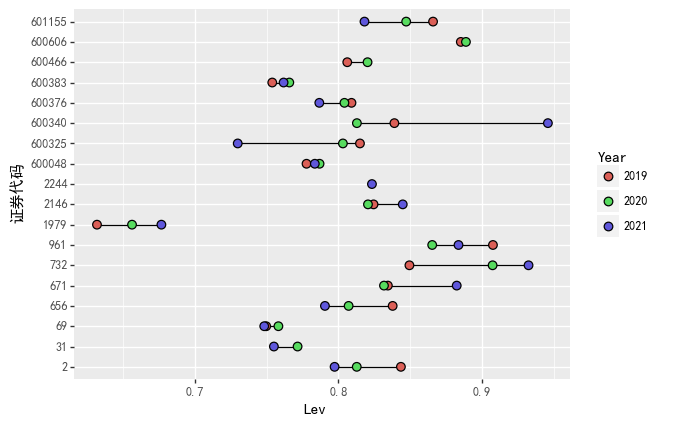

<ggplot: (157849883895)>

In [17]:
# 大规模size大于26的房地产公司经历疫情的Lev变化
data_compare = data_dis[dataK['Year'].isin([2019,2020,2021])]
data_compare['证券代码'] = data_compare['证券代码'].astype('category')
data_compare['Year'] = data_compare['Year'].astype('category')
p=(
    ggplot(data_compare[data_compare['Size']>26], aes('Lev', '证券代码', fill='Year'))
    + geom_line(aes(group='证券代码'))
    + geom_point(shape='o', size=3, color='k')
    + theme(text=element_text(family=['SimHei', 'Arial Unicode MS']))
)
p.save('D:/Latex_Project/Visualization_Project/Figures/covbiglev2.jpg', units = 'in', dpi=1000)
p

C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\1050563230.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\1050563230.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figure

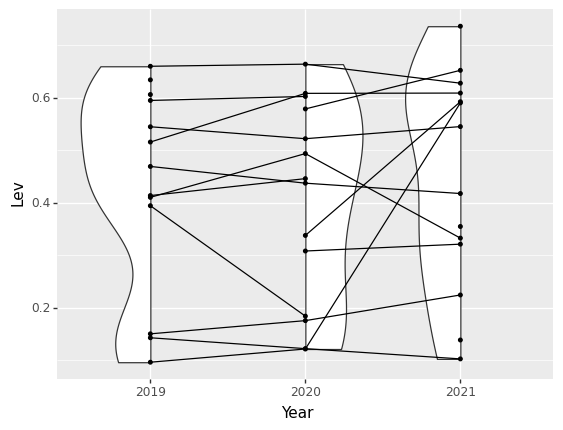

<ggplot: (157850514246)>

In [18]:
# 小规模2020年疫情前后的Lev变化
data_compare = data_dis[dataK['Year'].isin([2019,2020,2021])]
data_compare['证券代码'] = data_compare['证券代码'].astype('category')
data_compare['Year'] = data_compare['Year'].astype('category')
p=(
    ggplot(data_compare[data_compare['Size']<22], aes('Year', 'Lev'))
     + geom_violin(style='left-right') 
     + geom_point(shape='o', size=1, color='k')
     + geom_line(aes(group='证券代码'))          #根据id来进行连接
     + labs(x='Year', y='Lev')   
)
p.save('D:/Latex_Project/Visualization_Project/Figures/covsmalllev.jpg', units = 'in', dpi=1000)
p

C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\476790259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\476790259.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figures/

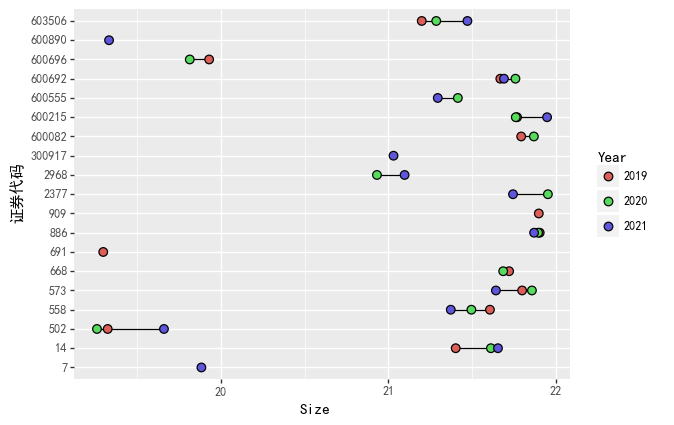

<ggplot: (157852895046)>

In [19]:
# 小规模size小于22的房地产公司经历疫情的Lev变化
data_compare = data_dis[dataK['Year'].isin([2019,2020,2021])]
data_compare['证券代码'] = data_compare['证券代码'].astype('category')
data_compare['Year'] = data_compare['Year'].astype('category')
p=(
    ggplot(data_compare[data_compare['Size']<22], aes('Size', '证券代码', fill='Year'))
    + geom_line(aes(group='证券代码'))
    + geom_point(shape='o', size=3, color='k')
    + theme(text=element_text(family=['SimHei', 'Arial Unicode MS']))
)
# 对于小房地产公司而言，大多是衰退，甚至退市。
p.save('D:/Latex_Project/Visualization_Project/Figures/covsmalllev2.jpg', units = 'in', dpi=1000)
p

C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\2259486257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\2259486257.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figure

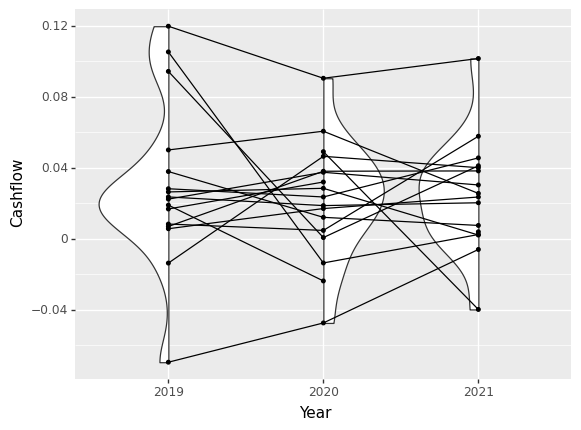

C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\2259486257.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\2259486257.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figu

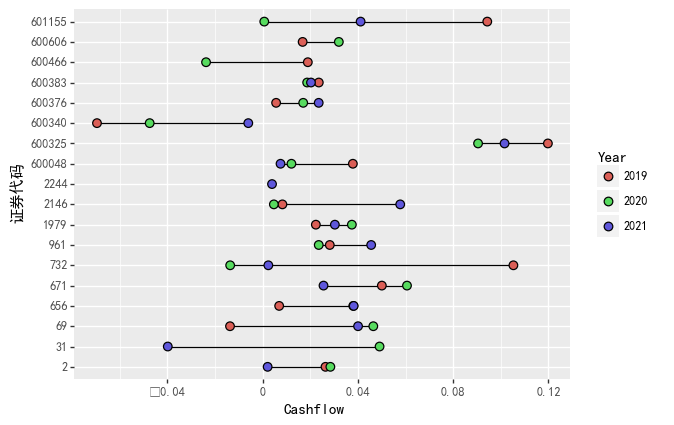

<ggplot: (157849702482)>

In [20]:
# 大规模在2020年疫情前后的Cashflow变化
data_compare = data_dis[dataK['Year'].isin([2019,2020,2021])]
data_compare['证券代码'] = data_compare['证券代码'].astype('category')
data_compare['Year'] = data_compare['Year'].astype('category')
p=(
    ggplot(data_compare[data_compare['Size']>26], aes('Year', 'Cashflow'))
     + geom_violin(style='left-right') 
     + geom_point(shape='o', size=1, color='k')
     + geom_line(aes(group='证券代码'))          #根据id来进行连接
     + labs(x='Year', y='Cashflow')   
)
p.save('D:/Latex_Project/Visualization_Project/Figures/covbigcash.jpg', units = 'in', dpi=1000)
print(p)
# size大于26的房地产公司经历疫情的cashflow变化
data_compare = data_dis[dataK['Year'].isin([2019,2020,2021])]
data_compare['证券代码'] = data_compare['证券代码'].astype('category')
data_compare['Year'] = data_compare['Year'].astype('category')
p=(
    ggplot(data_compare[data_compare['Size']>26], aes('Cashflow', '证券代码', fill='Year'))
    + geom_line(aes(group='证券代码'))
    + geom_point(shape='o', size=3, color='k')
    + theme(text=element_text(family=['SimHei', 'Arial Unicode MS']))
)
p.save('D:/Latex_Project/Visualization_Project/Figures/covbigcash2.jpg', units = 'in', dpi=1000)
p

C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\172963760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\172963760.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figures/

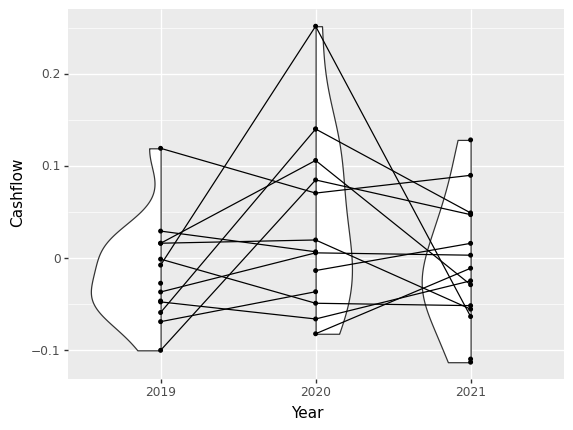

C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\172963760.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\172963760.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figure

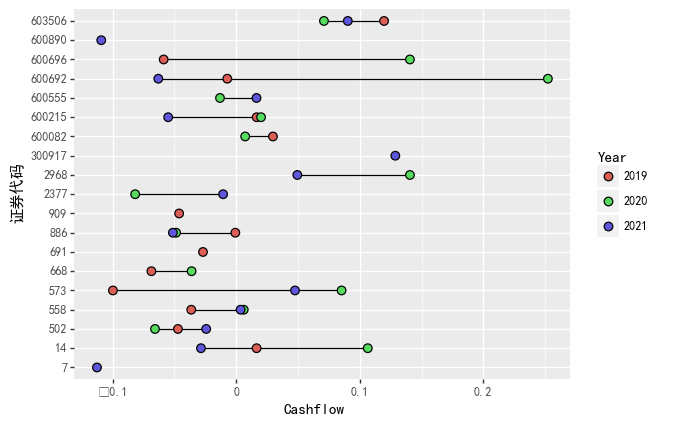

<ggplot: (157853158114)>

In [21]:
# 小规模在2020年疫情前后的cashflow变化
data_compare = data_dis[dataK['Year'].isin([2019,2020,2021])]
data_compare['证券代码'] = data_compare['证券代码'].astype('category')
data_compare['Year'] = data_compare['Year'].astype('category')
p=(
    ggplot(data_compare[data_compare['Size']<22], aes('Year', 'Cashflow'))
     + geom_violin(style='left-right') 
     + geom_point(shape='o', size=1, color='k')
     + geom_line(aes(group='证券代码'))          #根据id来进行连接
     + labs(x='Year', y='Cashflow')   
)
p.save('D:/Latex_Project/Visualization_Project/Figures/covsmallcash.jpg', units = 'in', dpi=1000)
print(p)
# size大于26的房地产公司经历疫情的cashflow变化
data_compare = data_dis[dataK['Year'].isin([2019,2020,2021])]
data_compare['证券代码'] = data_compare['证券代码'].astype('category')
data_compare['Year'] = data_compare['Year'].astype('category')
p=(
    ggplot(data_compare[data_compare['Size']<22], aes('Cashflow', '证券代码', fill='Year'))
    + geom_line(aes(group='证券代码'))
    + geom_point(shape='o', size=3, color='k')
    + theme(text=element_text(family=['SimHei', 'Arial Unicode MS']))
)
p.save('D:/Latex_Project/Visualization_Project/Figures/covsmallcash2.jpg', units = 'in', dpi=1000)
p

C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\1203258096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\1203258096.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figure

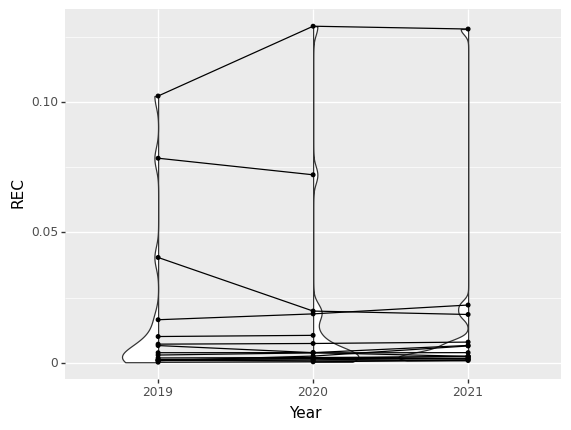

C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\1203258096.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\1203258096.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figu

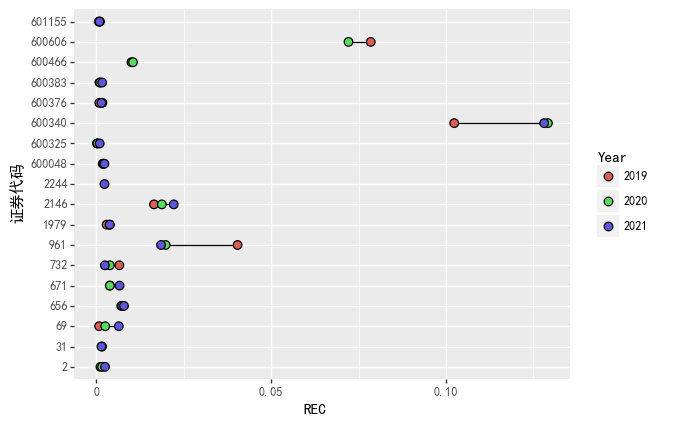

<ggplot: (157849985654)>

In [22]:
# 大规模2020年疫情前后的REC变化
data_compare = data_dis[dataK['Year'].isin([2019,2020,2021])]
data_compare['证券代码'] = data_compare['证券代码'].astype('category')
data_compare['Year'] = data_compare['Year'].astype('category')
p=(
    ggplot(data_compare[data_compare['Size']>26], aes('Year', 'REC'))
     + geom_violin(style='left-right') 
     + geom_point(shape='o', size=1, color='k')
     + geom_line(aes(group='证券代码'))          #根据id来进行连接
     + labs(x='Year', y='REC')   
)
p.save('D:/Latex_Project/Visualization_Project/Figures/covbigrec.jpg', units = 'in', dpi=1000)
print(p)

data_compare = data_dis[dataK['Year'].isin([2019,2020,2021])]
data_compare['证券代码'] = data_compare['证券代码'].astype('category')
data_compare['Year'] = data_compare['Year'].astype('category')
p=(
    ggplot(data_compare[data_compare['Size']>26], aes('REC', '证券代码', fill='Year'))
    + geom_line(aes(group='证券代码'))
    + geom_point(shape='o', size=3, color='k')
    + theme(text=element_text(family=['SimHei', 'Arial Unicode MS']))
)
p.save('D:/Latex_Project/Visualization_Project/Figures/covbigrec2.jpg', units = 'in', dpi=1000)
p

C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\228801892.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\228801892.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figures/

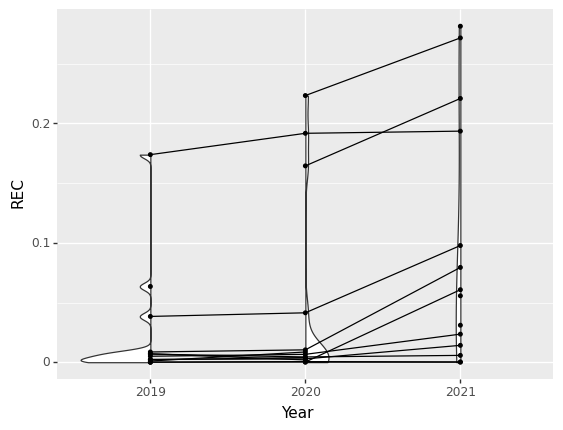

C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\228801892.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\228801892.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figure

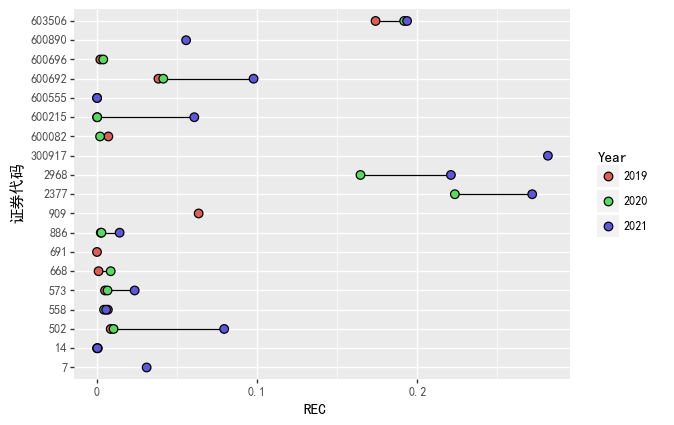

<ggplot: (157849751381)>

In [23]:
# 小规模在2020年疫情前后的REC变化
data_compare = data_dis[dataK['Year'].isin([2019,2020,2021])]
data_compare['证券代码'] = data_compare['证券代码'].astype('category')
data_compare['Year'] = data_compare['Year'].astype('category')
p=(
    ggplot(data_compare[data_compare['Size']<22], aes('Year', 'REC'))
     + geom_violin(style='left-right') 
     + geom_point(shape='o', size=1, color='k')
     + geom_line(aes(group='证券代码'))          #根据id来进行连接
     + labs(x='Year', y='REC')   
)
p.save('D:/Latex_Project/Visualization_Project/Figures/covsmallrec.jpg', units = 'in', dpi=1000)
print(p)

data_compare = data_dis[dataK['Year'].isin([2019,2020,2021])]
data_compare['证券代码'] = data_compare['证券代码'].astype('category')
data_compare['Year'] = data_compare['Year'].astype('category')
p=(
    ggplot(data_compare[data_compare['Size']<22], aes('REC', '证券代码', fill='Year'))
    + geom_line(aes(group='证券代码'))
    + geom_point(shape='o', size=3, color='k')
    + theme(text=element_text(family=['SimHei', 'Arial Unicode MS']))
)
p.save('D:/Latex_Project/Visualization_Project/Figures/covsmallrec2.jpg', units = 'in', dpi=1000)
p

实例化：按照Size大小，将前五个公司和后五个公司筛选出来  

In [26]:
dataK.sort_values(by="Size").head(20)
# 后五个从低到高为 2113, 526, 803, 567, 600753
dataK.sort_values(by="Size").tail(30)
# 前五个从低到高为  601155，1979，600606，600048，2
dataK = dataK[['证券代码','Year','Size','Lev','Cashflow','REC']]
# 将数据分为前五个公司和后五个公司
data_low = dataK[dataK['证券代码'].isin([2113, 526, 803, 567, 600753])]
# 后五个从低到高为 2113, 526, 803, 567, 600753
data_high = dataK[dataK['证券代码'].isin([601155,1979,600606,600048,2])]
# 前五个从低到高为  601155，1979，600606，600048，2

C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\3693653547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figures/low5size.jpg


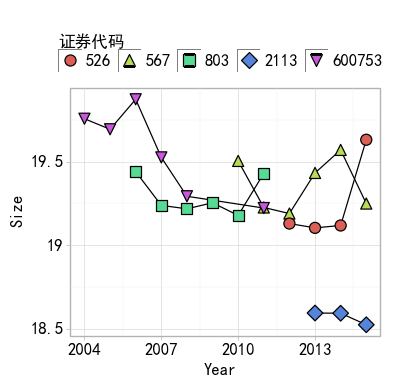

C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figures/low5lev.jpg


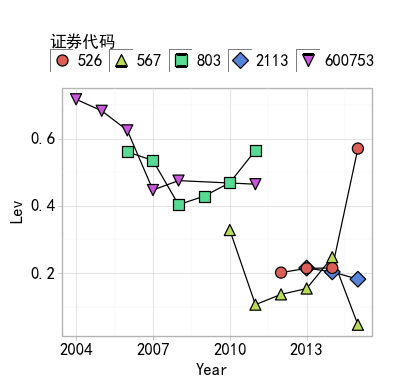

C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figures/low5cash.jpg
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:726: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
D:\applications\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


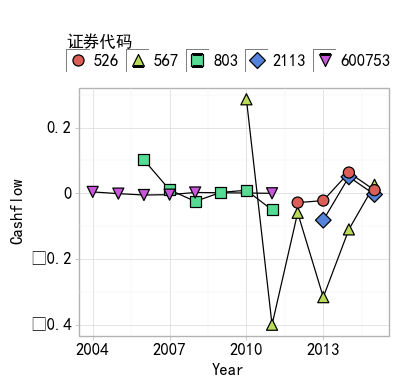

C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figures/low5rec.jpg


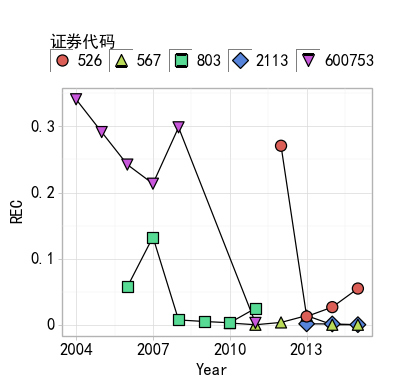

In [27]:
data_low['证券代码'] = data_low['证券代码'].astype('category')
# 
p=(
    ggplot(data_low,aes(x='Year',y='Size',fill='证券代码', shape='证券代码')) 
    + geom_line(aes(group='证券代码'))
    + geom_point(size=4,color="black") 
    + theme_classic()
    + theme_light()
    + theme(text=element_text(family=['SimHei', 'Arial Unicode MS'],size=12,colour = "black"),
        aspect_ratio=0.8,
        dpi=100,
        figure_size=(4,4),
        legend_position=(0.5,1),
        legend_background=element_rect(fill="none"))
)
p.save('D:/Latex_Project/Visualization_Project/Figures/low5size.jpg', height=5, width=5, units = 'in', dpi=1000)
print(p)
p=(
    ggplot(data_low,aes(x='Year',y='Lev',fill='证券代码', shape='证券代码')) 
    + geom_line(aes(group='证券代码'))
    + geom_point(size=4,color="black") 
    + theme_classic()
    + theme_light()
    + theme(text=element_text(family=['SimHei', 'Arial Unicode MS'],size=12,colour = "black"),
        aspect_ratio=0.8,
        dpi=100,
        figure_size=(4,4),
        legend_position=(0.5,1),
        legend_background=element_rect(fill="none"))
)
p.save('D:/Latex_Project/Visualization_Project/Figures/low5lev.jpg', height=5, width=5, units = 'in', dpi=1000)
print(p)
p=(
    ggplot(data_low,aes(x='Year',y='Cashflow',fill='证券代码', shape='证券代码')) 
    + geom_line(aes(group='证券代码'))
    + geom_point(size=4,color="black") 
    + theme_classic()
    + theme_light()
    + theme(text=element_text(family=['SimHei', 'Arial Unicode MS'],size=12,colour = "black"),
        aspect_ratio=0.8,
        dpi=100,
        figure_size=(4,4),
        legend_position=(0.5,1),
        legend_background=element_rect(fill="none"))
)
p.save('D:/Latex_Project/Visualization_Project/Figures/low5cash.jpg', height=5, width=5, units = 'in', dpi=1000)
print(p)
p=(
    ggplot(data_low,aes(x='Year',y='REC',fill='证券代码', shape='证券代码')) 
    + geom_line(aes(group='证券代码'))
    + geom_point(size=4,color="black") 
    + theme_classic()
    + theme_light()
    + theme(text=element_text(family=['SimHei', 'Arial Unicode MS'],size=12,colour = "black"),
        aspect_ratio=0.8,
        dpi=100,
        figure_size=(4,4),
        legend_position=(0.5,1),
        legend_background=element_rect(fill="none"))
)
p.save('D:/Latex_Project/Visualization_Project/Figures/low5rec.jpg', height=5, width=5, units = 'in', dpi=1000)
print(p)

C:\Users\sherly\AppData\Local\Temp\ipykernel_16344\4059614033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figures/high5size.jpg


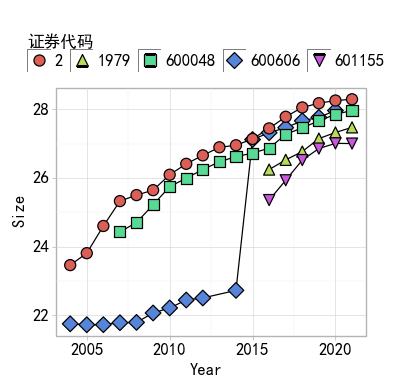

C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figures/high5lev.jpg


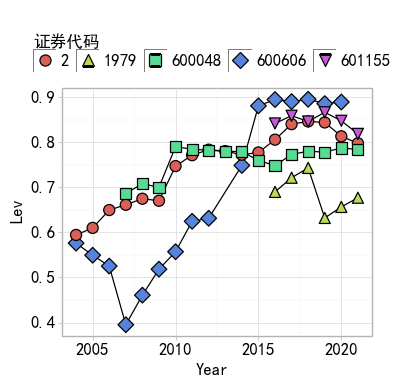

C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figures/high5cash.jpg
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:726: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
D:\applications\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


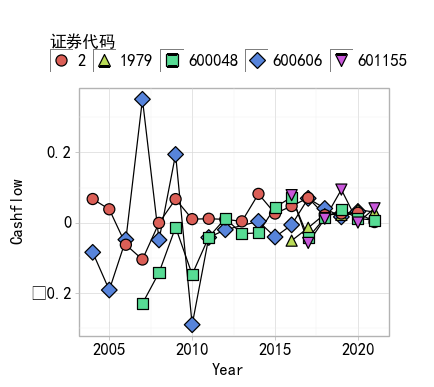

C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\sherly\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: D:/Latex_Project/Visualization_Project/Figures/high5rec.jpg


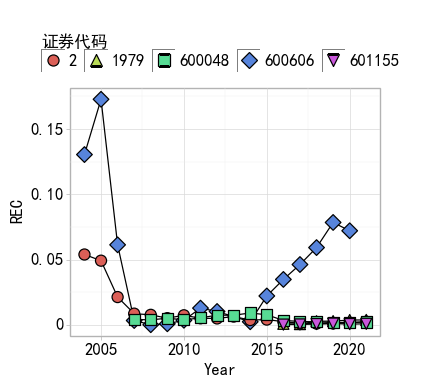

In [28]:
data_high['证券代码'] = data_high['证券代码'].astype('category')
# 
p=(
    ggplot(data_high,aes(x='Year',y='Size',fill='证券代码', shape='证券代码')) 
    + geom_line(aes(group='证券代码'))
    + geom_point(size=4,color="black") 
    + theme_classic()
    + theme_light()
    + theme(text=element_text(family=['SimHei', 'Arial Unicode MS'],size=12,colour = "black"),
        aspect_ratio=0.8,
        dpi=100,
        figure_size=(4,4),
        legend_position=(0.5,1),
        legend_background=element_rect(fill="none"))
)
p.save('D:/Latex_Project/Visualization_Project/Figures/high5size.jpg', height=5, width=5, units = 'in', dpi=1000)
print(p)
p=(
    ggplot(data_high,aes(x='Year',y='Lev',fill='证券代码', shape='证券代码')) 
    + geom_line(aes(group='证券代码'))
    + geom_point(size=4,color="black") 
    + theme_classic()
    + theme_light()
    + theme(text=element_text(family=['SimHei', 'Arial Unicode MS'],size=12,colour = "black"),
        aspect_ratio=0.8,
        dpi=100,
        figure_size=(4,4),
        legend_position=(0.5,1),
        legend_background=element_rect(fill="none"))
)
p.save('D:/Latex_Project/Visualization_Project/Figures/high5lev.jpg', height=5, width=5, units = 'in', dpi=1000)
print(p)
p=(
    ggplot(data_high,aes(x='Year',y='Cashflow',fill='证券代码', shape='证券代码')) 
    + geom_line(aes(group='证券代码'))
    + geom_point(size=4,color="black") 
    + theme_classic()
    + theme_light()
    + theme(text=element_text(family=['SimHei', 'Arial Unicode MS'],size=12,colour = "black"),
        aspect_ratio=0.8,
        dpi=100,
        figure_size=(4,4),
        legend_position=(0.5,1),
        legend_background=element_rect(fill="none"))
)
p.save('D:/Latex_Project/Visualization_Project/Figures/high5cash.jpg', height=5, width=5, units = 'in', dpi=1000)
print(p)
p=(
    ggplot(data_high,aes(x='Year',y='REC',fill='证券代码', shape='证券代码')) 
    + geom_line(aes(group='证券代码'))
    + geom_point(size=4,color="black") 
    + theme_classic()
    + theme_light()
    + theme(text=element_text(family=['SimHei', 'Arial Unicode MS'],size=12,colour = "black"),
        aspect_ratio=0.8,
        dpi=100,
        figure_size=(4,4),
        legend_position=(0.5,1),
        legend_background=element_rect(fill="none"))
)
p.save('D:/Latex_Project/Visualization_Project/Figures/high5rec.jpg', height=5, width=5, units = 'in', dpi=1000)
print(p)